In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
for dirname, _, filenames in os.walk('/kaggle/input/reuters'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore') 
from keras import layers, models, callbacks
from keras.layers.core import Dense, Dropout 

In [59]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [60]:
reuters = tf.keras.datasets.reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data()

In [61]:
reuters

<module 'keras.api._v2.keras.datasets.reuters' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/reuters/__init__.py'>

In [62]:
x_train.shape

(8982,)

In [63]:
from keras import utils
from keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words=10000)
seq = np.concatenate((x_train, x_test), axis=0)
t.fit_on_sequences(seq)

xt_train = t.sequences_to_matrix(x_train, mode='tfidf')
xt_test = t.sequences_to_matrix(x_test, mode='tfidf')

yt_train = utils.to_categorical(y_train, max(y_train) + 1)
yt_test = utils.to_categorical(y_test, max(y_train) + 1)

In [64]:
activations = ['relu', 'softmax'] 
layer_sizes = [512, 46] # for each layer a size is given
optimizer_method = 'adadelta'
batch_size = 128
epochs = 5
callback = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, 
                                   patience=2, mode='auto')

In [65]:
#a)only gradient Descent

modelgd = models.Sequential()
modelgd.add(layers.Dense(layer_sizes[0], input_shape=(10000,), activation=activations[0]))
modelgd.add(Dropout(0.5))
modelgd.add(layers.Dense(layer_sizes[1], activation=activations[1]))
modelgd.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#b) ADAGRAD

modeladgrad = models.Sequential()
modeladgrad.add(layers.Dense(layer_sizes[0], input_shape=(10000,), activation=activations[0]))
modeladgrad.add(Dropout(0.5))
modeladgrad.add(layers.Dense(layer_sizes[1], activation=activations[1]))
modeladgrad.compile(optimizer='adagrad', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#c) RMSPROP

modelrms = models.Sequential()
modelrms.add(layers.Dense(layer_sizes[0], input_shape=(10000,), activation=activations[0]))
modelrms.add(Dropout(0.5))
modelrms.add(layers.Dense(layer_sizes[1], activation=activations[1]))
modelrms.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#d) ADAM

modeladm = models.Sequential()
modeladm.add(layers.Dense(layer_sizes[0], input_shape=(10000,), activation=activations[0]))
modeladm.add(Dropout(0.5))
modeladm.add(layers.Dense(layer_sizes[1], activation=activations[1]))
modeladm.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])





#e) ADADELTA

modeladadelta = models.Sequential()
modeladadelta.add(layers.Dense(layer_sizes[0], input_shape=(10000,), activation=activations[0]))
modeladadelta.add(Dropout(0.5))
modeladadelta.add(layers.Dense(layer_sizes[1], activation=activations[1]))
modeladadelta.compile(optimizer='Adadelta', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
           


#f) SGD

modelsgd = models.Sequential()
modelsgd.add(layers.Dense(layer_sizes[0], input_shape=(10000,), activation=activations[0]))
modelsgd.add(Dropout(0.5))
modelsgd.add(layers.Dense(layer_sizes[1], activation=activations[1]))
modelsgd.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [66]:
Hist1=modelgd.fit(xt_train, y_train, epochs=10)

Epoch 1/10
281/281 [==============================] - 2s 5ms/step - loss: 1.1963 - accuracy: 0.7640
Epoch 2/10
281/281 [==============================] - 1s 5ms/step - loss: 0.5211 - accuracy: 0.8989
Epoch 3/10
281/281 [==============================] - 1s 4ms/step - loss: 0.3604 - accuracy: 0.9360
Epoch 4/10
281/281 [==============================] - 1s 4ms/step - loss: 0.3055 - accuracy: 0.9457
Epoch 5/10
281/281 [==============================] - 1s 4ms/step - loss: 0.2951 - accuracy: 0.9508
Epoch 6/10
281/281 [==============================] - 1s 4ms/step - loss: 0.2784 - accuracy: 0.9525
Epoch 7/10
281/281 [==============================] - 1s 4ms/step - loss: 0.2843 - accuracy: 0.9519
Epoch 8/10
281/281 [==============================] - 1s 4ms/step - loss: 0.2714 - accuracy: 0.9534
Epoch 9/10
281/281 [==============================] - 1s 4ms/step - loss: 0.2653 - accuracy: 0.9536
Epoch 10/10
281/281 [==============================] - 1s 4ms/step - loss: 0.2884 - accuracy: 0.9539

In [67]:
hist2=modeladgrad.fit(xt_train, y_train, epochs=15)

Epoch 1/15
281/281 [==============================] - 2s 4ms/step - loss: 2.5766 - accuracy: 0.4701
Epoch 2/15
281/281 [==============================] - 1s 4ms/step - loss: 1.6738 - accuracy: 0.6486
Epoch 3/15
281/281 [==============================] - 1s 5ms/step - loss: 1.3737 - accuracy: 0.7054
Epoch 4/15
281/281 [==============================] - 1s 4ms/step - loss: 1.1858 - accuracy: 0.7453
Epoch 5/15
281/281 [==============================] - 1s 4ms/step - loss: 1.0718 - accuracy: 0.7717
Epoch 6/15
281/281 [==============================] - 1s 4ms/step - loss: 0.9653 - accuracy: 0.7931
Epoch 7/15
281/281 [==============================] - 1s 4ms/step - loss: 0.8901 - accuracy: 0.8112
Epoch 8/15
281/281 [==============================] - 1s 4ms/step - loss: 0.8170 - accuracy: 0.8264
Epoch 9/15
281/281 [==============================] - 1s 4ms/step - loss: 0.7589 - accuracy: 0.8421
Epoch 10/15
281/281 [==============================] - 1s 4ms/step - loss: 0.7106 - accuracy: 0.8511

In [68]:
hist3=modelrms.fit(xt_train, y_train, epochs=15)

Epoch 1/15
281/281 [==============================] - 2s 4ms/step - loss: 1.2068 - accuracy: 0.7686
Epoch 2/15
281/281 [==============================] - 1s 4ms/step - loss: 0.5132 - accuracy: 0.9030
Epoch 3/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.9375
Epoch 4/15
281/281 [==============================] - 2s 6ms/step - loss: 0.3197 - accuracy: 0.9452
Epoch 5/15
281/281 [==============================] - 1s 5ms/step - loss: 0.2948 - accuracy: 0.9507
Epoch 6/15
281/281 [==============================] - 1s 4ms/step - loss: 0.2843 - accuracy: 0.9535
Epoch 7/15
281/281 [==============================] - 1s 4ms/step - loss: 0.2760 - accuracy: 0.9511
Epoch 8/15
281/281 [==============================] - 1s 5ms/step - loss: 0.2590 - accuracy: 0.9547
Epoch 9/15
281/281 [==============================] - 1s 4ms/step - loss: 0.2706 - accuracy: 0.9548
Epoch 10/15
281/281 [==============================] - 1s 4ms/step - loss: 0.2709 - accuracy: 0.9561

In [69]:
hist4=modeladm.fit(xt_train, y_train, epochs=15)

Epoch 1/15
281/281 [==============================] - 3s 5ms/step - loss: 1.2104 - accuracy: 0.7574
Epoch 2/15
281/281 [==============================] - 2s 8ms/step - loss: 0.4504 - accuracy: 0.9156
Epoch 3/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3704 - accuracy: 0.9404
Epoch 4/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3474 - accuracy: 0.9439
Epoch 5/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3651 - accuracy: 0.9457
Epoch 6/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3569 - accuracy: 0.9476
Epoch 7/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3772 - accuracy: 0.9487
Epoch 8/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3856 - accuracy: 0.9480
Epoch 9/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3998 - accuracy: 0.9468
Epoch 10/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.9516

In [70]:
hist5=modeladadelta.fit(xt_train, y_train, epochs=15)

Epoch 1/15
281/281 [==============================] - 2s 4ms/step - loss: 4.0552 - accuracy: 0.0210
Epoch 2/15
281/281 [==============================] - 1s 4ms/step - loss: 3.9626 - accuracy: 0.0353
Epoch 3/15
281/281 [==============================] - 1s 4ms/step - loss: 3.8627 - accuracy: 0.0573
Epoch 4/15
281/281 [==============================] - 1s 4ms/step - loss: 3.7624 - accuracy: 0.0925
Epoch 5/15
281/281 [==============================] - 1s 4ms/step - loss: 3.6805 - accuracy: 0.1335
Epoch 6/15
281/281 [==============================] - 1s 5ms/step - loss: 3.5961 - accuracy: 0.1782
Epoch 7/15
281/281 [==============================] - 1s 5ms/step - loss: 3.5083 - accuracy: 0.2242
Epoch 8/15
281/281 [==============================] - 1s 4ms/step - loss: 3.4292 - accuracy: 0.2760
Epoch 9/15
281/281 [==============================] - 1s 4ms/step - loss: 3.3355 - accuracy: 0.3182
Epoch 10/15
281/281 [==============================] - 1s 4ms/step - loss: 3.2818 - accuracy: 0.3507

In [71]:
hist6=modelsgd.fit(xt_train, y_train, epochs=15)

Epoch 1/15
281/281 [==============================] - 2s 5ms/step - loss: 1.8429 - accuracy: 0.6128
Epoch 2/15
281/281 [==============================] - 1s 4ms/step - loss: 1.0077 - accuracy: 0.7817
Epoch 3/15
281/281 [==============================] - 1s 4ms/step - loss: 0.7379 - accuracy: 0.8464
Epoch 4/15
281/281 [==============================] - 1s 4ms/step - loss: 0.5795 - accuracy: 0.8791
Epoch 5/15
281/281 [==============================] - 1s 4ms/step - loss: 0.4789 - accuracy: 0.8981
Epoch 6/15
281/281 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.9112
Epoch 7/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3567 - accuracy: 0.9217
Epoch 8/15
281/281 [==============================] - 1s 4ms/step - loss: 0.3146 - accuracy: 0.9303
Epoch 9/15
281/281 [==============================] - 1s 4ms/step - loss: 0.2896 - accuracy: 0.9356
Epoch 10/15
281/281 [==============================] - 1s 4ms/step - loss: 0.2534 - accuracy: 0.9415

In [72]:
ep=np.arange(2,20,2)

In [73]:
acc1=Hist1.history['accuracy']
acc2=hist2.history['accuracy']
acc3=hist3.history['accuracy']
acc4=hist4.history['accuracy']
acc5=hist5.history['accuracy']
acc6=hist6.history['accuracy']


list_of_tuples = list(zip(ep,acc1,acc2,acc3,acc4,acc5,acc6)) 

In [74]:
df = pd.DataFrame(list_of_tuples, columns = ['Epoch','onlyGD','Adagrad','RMSprop', 'ADAM','AdaDelta','SGD']) 

<AxesSubplot:xlabel='Epoch'>

(0.0, 1.0)

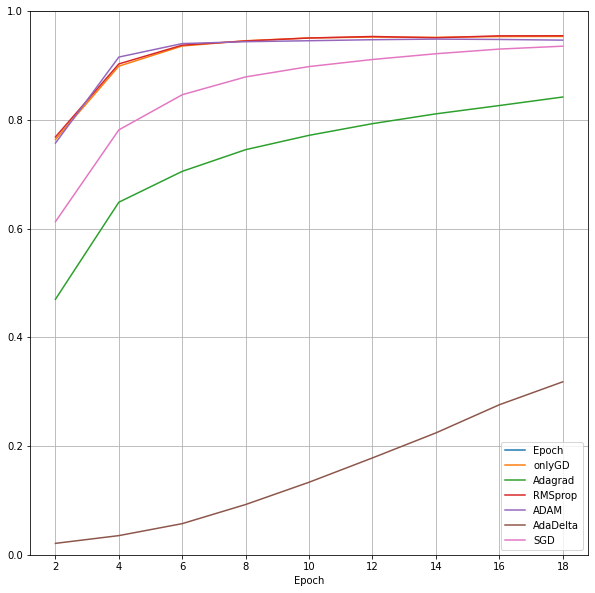

In [75]:
df.index = df['Epoch']
df.plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [76]:
print("Gradient Descent:")
modelgd.evaluate(xt_test, y_test)
print("\n")
print("\nAdgrad:")
modeladgrad.evaluate(xt_test, y_test)
print("\n")
print("\nRMSProp:")
modelrms.evaluate(xt_test, y_test)
print("\n")
print("\nADAM:")
modeladm.evaluate(xt_test, y_test)
print("\n")
print("\nADADelta:")
modeladadelta.evaluate(xt_test, y_test)
print("\n")
print("\nStochastic GD:")
modelsgd.evaluate(xt_test, y_test)

Gradient Descent:
71/71 [==============================] - 0s 3ms/step - loss: 1.7503 - accuracy: 0.8099


[1.750252604484558, 0.809884250164032]




Adgrad:
71/71 [==============================] - 0s 3ms/step - loss: 0.9155 - accuracy: 0.8094


[0.9155397415161133, 0.8094390034675598]




RMSProp:
71/71 [==============================] - 0s 3ms/step - loss: 2.0221 - accuracy: 0.8045


[2.022062063217163, 0.8045414090156555]




ADAM:
71/71 [==============================] - 0s 3ms/step - loss: 1.5320 - accuracy: 0.7979


[1.5319664478302002, 0.7978628873825073]




ADADelta:
71/71 [==============================] - 0s 3ms/step - loss: 2.8117 - accuracy: 0.5049


[2.8116836547851562, 0.5048975944519043]




Stochastic GD:
71/71 [==============================] - 0s 3ms/step - loss: 0.8674 - accuracy: 0.8232


[0.8674330115318298, 0.8232412934303284]